In [1]:
from options_number import options
l = options(193437)
l

[24172, 24172, 24172, 22060, 22060, 22060, 24172, 22060, 22481, 22486]


[24172, 24172, 24172, 22060, 22060, 22060, 24172, 22060, 22481, 22486]

Text(0.5, 0.98, 'Categorical Plotting')

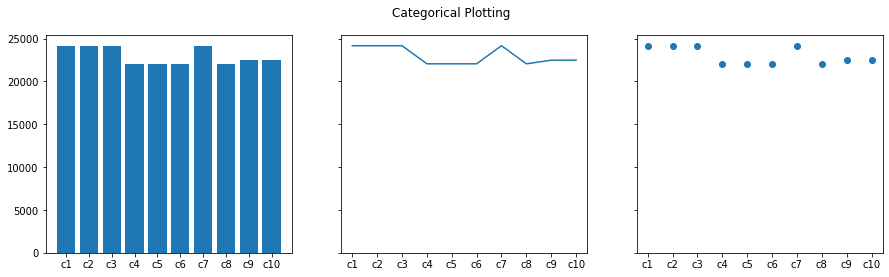

In [2]:
import matplotlib.pyplot as plt

names = ['c1', 'c2','c3', 'c4','c5','c6','c7','c8','c9','c10']
values = l

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axs[0].bar(names, values)
axs[1].plot(names, values)
axs[2].scatter(names, values)
fig.suptitle('Categorical Plotting')

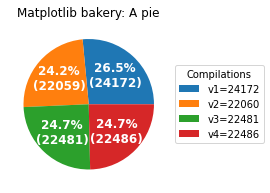

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["24172 v1=24172",
          "22060 v2=22060",
          "22481 v3=22481",
          "22486 v4=22486"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Compilations",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()